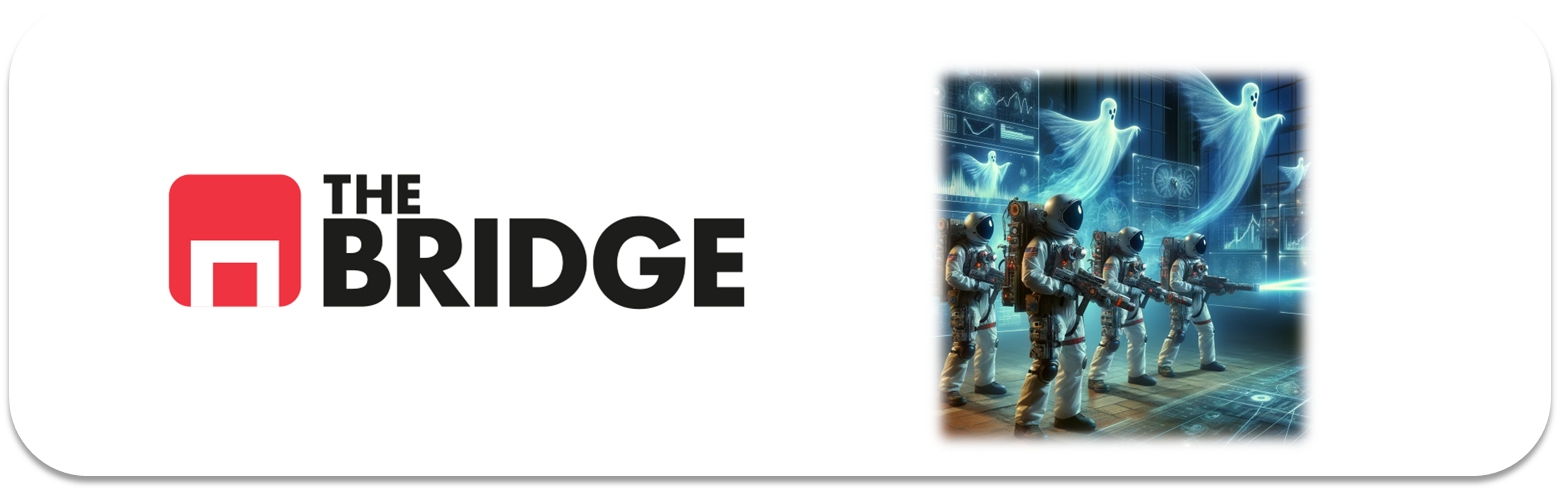

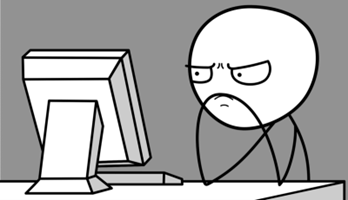

Para ejercitarte y afianzar lo aprendido sobre **Series Temporales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### El "problema"

Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from pmdarima.arima import ARIMA, auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

### Ejercicio 1

Carga los datos y adecúa el dataset teniendo en cuenta que es una serie temporal. Para ello convierte la columna de fecha al formato adecuado y luego úsala como índice.

In [2]:
df_serie=pd.read_csv("./data/AirPassengers.csv")
df_serie["date"]=pd.to_datetime(df_serie["date"])
df_serie=df_serie.sort_values("date").set_index("date")
df_serie

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


### Ejercicio 2

¿De qué fecha a qué fecha va el histórico?¿Qué periodicidad tiene la serie?

In [3]:
# Es mensual registrandose el primer día de cada mes y va desde enero de 1949 hasta diciembre de 1960

### Ejercicio 3

¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad? Analiza de manera gráfica, pero todavía sin descomponer la serie.

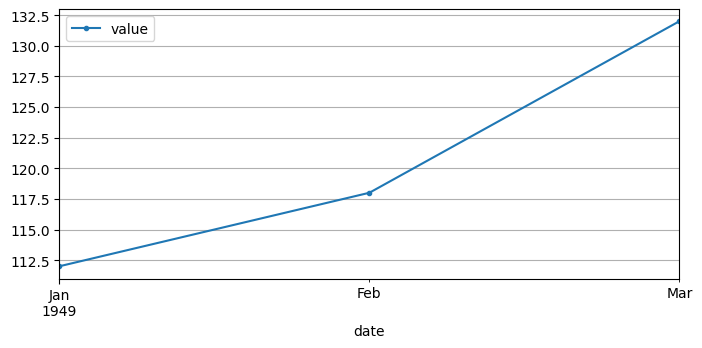

In [4]:
df_serie["1949-01":"1949-03"].plot(grid=True, marker=".", figsize=(8, 3.5))
plt.show()

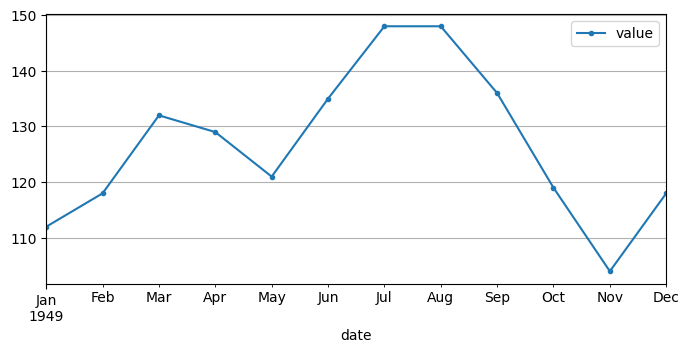

In [5]:
df_serie["1949-01":"1949-12"].plot(grid=True, marker=".", figsize=(8, 3.5))
plt.show()

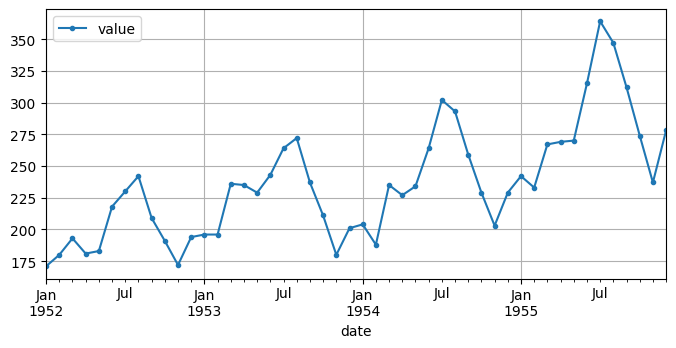

In [6]:
df_serie["1952-01":"1955-12"].plot(grid=True, marker=".", figsize=(8, 3.5))
plt.show()

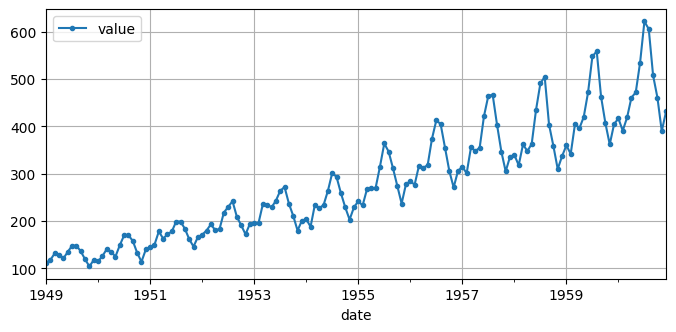

In [7]:
df_serie["1949-01":"1960-12"].plot(grid=True, marker=".", figsize=(8, 3.5))
plt.show()

In [8]:
#No hay estacionalidad semanal, hay estacionalidad mensual siempre esxisten valores mayores desde mediados de mayo hasta mediados de septiembre y siempre caen los valores en noviembre

### Ejercicio 4

¿Podrías demostrar de dos maneras estadísticas que la serie no es estacionaria?

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_serie["value"].values)
result[1]

0.991880243437641

In [10]:
result_diff = adfuller(df_serie['value'].diff(12)["1950":"1960"].values)
result_diff[1]

0.011551493085514954

In [11]:
#No es estacionaria

### Ejercicio 5

Emplea la descomposición que hemos aprendido en el workout para representar gráficamente la tendencia. Si has mostrado gráficamente la tendencia en el ejercicio 3, compara ambos.

In [13]:
period = slice("1949","1960")
df_monthly = df_serie.resample('M').mean() 
rolling_average_12_months = df_monthly[period].rolling(window=12).mean()

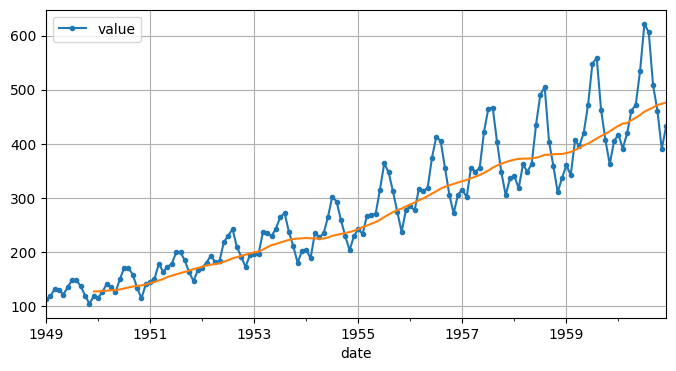

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
df_monthly[period].plot(ax=ax, marker=".")
rolling_average_12_months.plot(ax=ax, grid=True, legend=False)
# extra code – saves the figure for the book
plt.show()

In [ ]:
#se vé claramente como la tendencia es ascendente al igual que se veía en el grafico del ejercicio 3

### Ejercicio 6

Visualiza todos los componentes de la serie temporal por separado

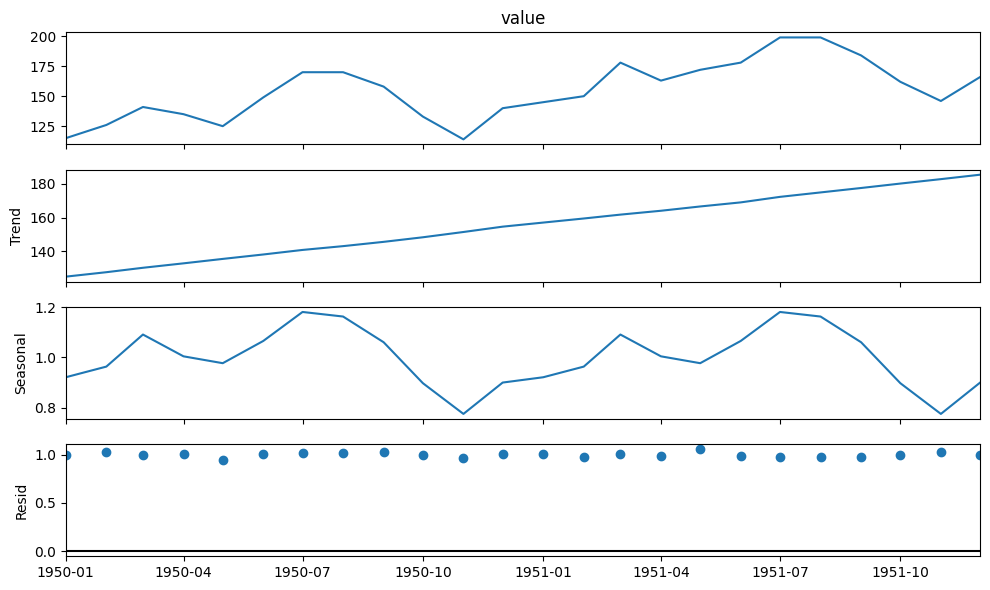

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_serie["1950":"1951"]['value'], model = 'multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition
result_add = seasonal_decompose(df_serie["1950":"1951"]['value'], model = 'additive', extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,6)})
result_mul.plot();

### Ejercicio 7

Crea una matriz de correlación con los últimos 24 instantes (matriz de autocorrelación). Crea un dataframe con shift de 1 a 24 para ello, la idea es que puedas hacer una matriz de correlación con el valor actual y los 24 valores anteriores. Es decir de un mes con sus 23 meses anteriores. Interpreta la estacionalidad

In [17]:
df_corr=df_serie.copy()
for i in range(1, 25):
    df_corr[f'anterior_{i}'] = df_corr['value'].shift(i)

In [18]:
corr_matrix=df_corr.corr()
corr_matrix

,value,anterior_1,anterior_2,anterior_3,anterior_4,anterior_5,anterior_6,anterior_7,anterior_8,anterior_9,...,anterior_15,anterior_16,anterior_17,anterior_18,anterior_19,anterior_20,anterior_21,anterior_22,anterior_23,anterior_24
value,1.000000,0.960195,0.895675,0.837395,0.797735,0.785943,0.783919,0.784592,0.792215,0.827852,...,0.811466,0.769449,0.755819,0.748752,0.745500,0.751789,0.794503,0.859013,0.936717,0.983254
anterior_1,0.960195,1.000000,0.960249,0.894473,0.836002,0.799965,0.789839,0.783123,0.782117,0.789786,...,0.873978,0.809895,0.772589,0.758554,0.746990,0.742383,0.748663,0.792162,0.857753,0.936016
anterior_2,0.895675,0.960249,1.000000,0.961133,0.896597,0.844427,0.810070,0.793150,0.783274,0.782019,...,0.948515,0.876648,0.820705,0.782270,0.761404,0.746891,0.741501,0.748349,0.791002,0.857340
anterior_3,0.837395,0.894473,0.961133,1.000000,0.960920,0.899075,0.846777,0.807324,0.789193,0.779140,...,0.990352,0.948198,0.880003,0.821756,0.778513,0.756759,0.742340,0.736571,0.745939,0.788181
anterior_4,0.797735,0.836002,0.896597,0.960920,1.000000,0.962171,0.898945,0.842121,0.802115,0.783723,...,0.950134,0.990073,0.949890,0.878362,0.815969,0.772561,0.751383,0.735816,0.734840,0.742572
anterior_5,0.785943,0.799965,0.844427,0.899075,0.962171,1.000000,0.959887,0.894424,0.838784,0.797732,...,0.884734,0.950972,0.989436,0.946493,0.873256,0.812399,0.769903,0.746027,0.740066,0.735589
anterior_6,0.783919,0.789839,0.810070,0.846777,0.898945,0.959887,1.000000,0.959373,0.894852,0.837280,...,0.830397,0.883838,0.947442,0.988754,0.946279,0.874178,0.813429,0.766791,0.753499,0.743406
anterior_7,0.784592,0.783123,0.793150,0.807324,0.842121,0.894424,0.959373,1.000000,0.959009,0.892632,...,0.789233,0.824790,0.878387,0.945637,0.988333,0.945979,0.873034,0.809080,0.768288,0.752019
anterior_8,0.792215,0.782117,0.783274,0.789193,0.802115,0.838784,0.894852,0.959009,1.000000,0.957989,...,0.775403,0.783309,0.821224,0.877444,0.944492,0.988050,0.945085,0.869954,0.808463,0.765279
anterior_9,0.827852,0.789786,0.782019,0.779140,0.783723,0.797732,0.837280,0.892632,0.957989,1.000000,...,0.771336,0.769381,0.778594,0.818353,0.874379,0.943098,0.987990,0.943800,0.870097,0.806107


<Axes: >

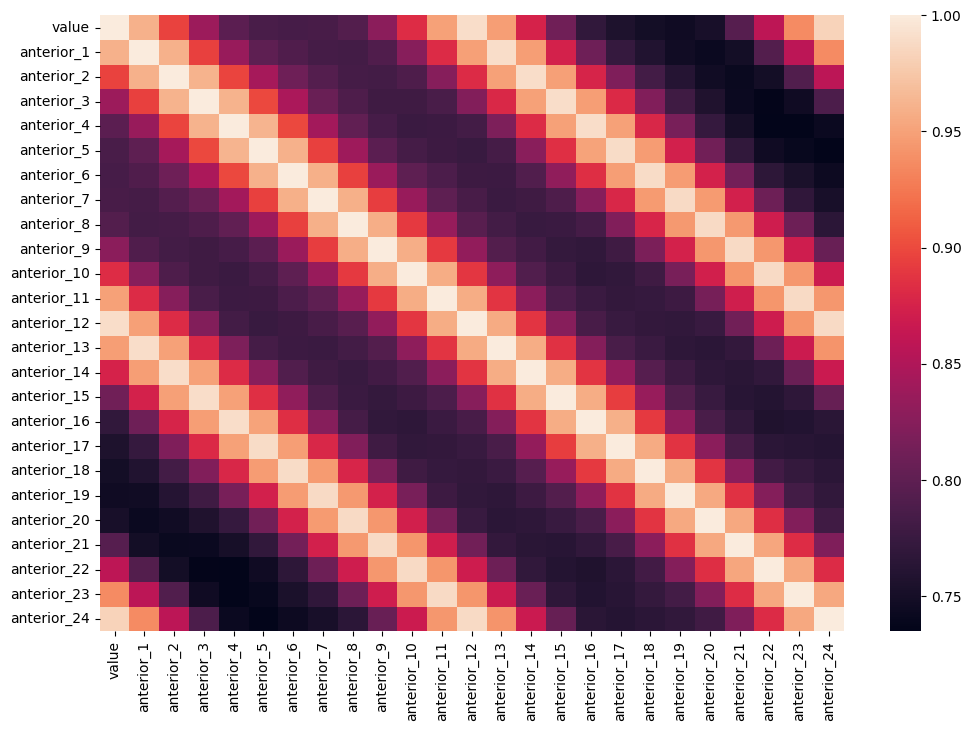

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix)

### Ejercicio 8
Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

In [ ]:
#Se cumple cada 12 meses, lo que dura un año

### Ejercicio 9

 Divide en train y test. En este caso no haremos división en validación, entre otras razones por la cantidad de datos que tenemos. Guarda 20 muestras para test.

In [20]:
X_train= df_serie.iloc[:-20,:]
X_test= df_serie.iloc[-20:,:]

### Ejercicio 10

Pon en práctica lo visto en clases, crea un modelo de ARIMA (puedes utilizar autoarima), mide su RMSE y su MAPE. Comparalo gráficamente con los valores reales.

In [22]:
from pmdarima.arima import auto_arima

model = auto_arima(X_train,
                   start_p = 0,
                   start_q = 0,
                   max_p = 5,
                   max_q = 5,
                   max_d = 3,
                   trace= True,
                   stepwise = False)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=1180.340, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=1171.576, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=1174.338, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=1164.464, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=1171.757, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=1171.514, Time=0.0

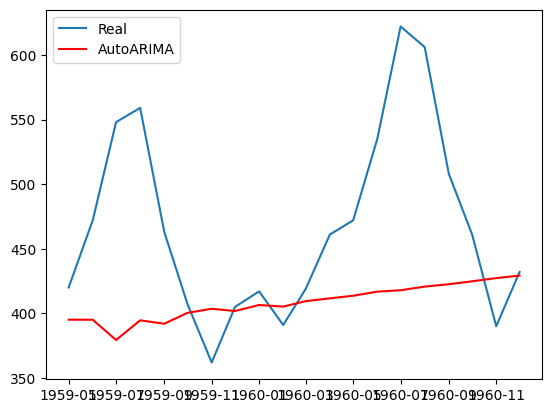

In [24]:
y_pred = model.predict(20)
plt.plot(X_test, label = "Real")
plt.plot(y_pred,color='red', label = "AutoARIMA")
plt.legend()

In [27]:
rmse = np.sqrt(mean_squared_error(X_test, y_pred))
mape = mean_absolute_percentage_error(X_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RMSE: 93.54868540548213
MAPE: 0.1317380015440821


### Ejercicio 11

Haz lo mismo que en el ejercicio 10 pero con un modelo SARIMA. ¿Cuál es mejor y por qué?

In [29]:
model_2 = auto_arima(X_train,
                   start_p = 0,
                   start_q = 0,
                   max_p = 5,
                   max_q = 5,
                   max_d = 3,
                   m=12,
                   trace= True,
                   stepwise = False)

 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=942.581, Time=0.02 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=944.471, Time=0.13 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=946.468, Time=0.31 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=944.471, Time=0.16 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=946.470, Time=0.18 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=948.468, Time=0.53 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=946.471, Time=0.45 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=948.469, Time=0.45 sec
 ARIMA(0,0,0)(2,1,2)[12] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=889.425, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=890.316, Time=0.16 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=892.265, Time=0.41 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=890.384, Time=0.18 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=892.272, Time=0.40 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=894.265, Time=0.52 sec
 ARIMA(0,0,1)(

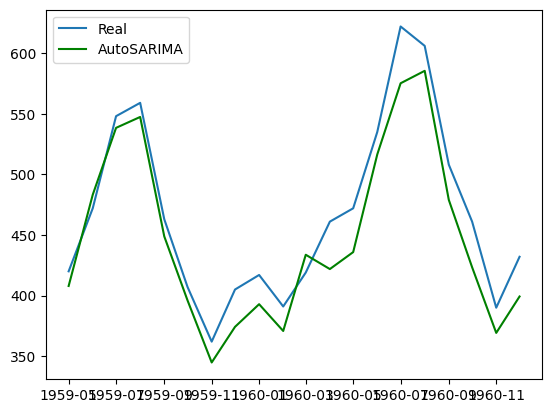

In [30]:
y_pred_2 = model_2.predict(20)
plt.plot(X_test, label = "Real")
plt.plot(y_pred_2,color='green', label = "AutoSARIMA")
plt.legend()

In [31]:
rmse_2= np.sqrt(mean_squared_error(X_test, y_pred))
mape_2 = mean_absolute_percentage_error(X_test, y_pred)
print(f"RMSE: {rmse}")
print(f"mape_2: {mape_2}")

RMSE: 113.15721963481747
mape_2: 0.1715083028454719
